<a href="https://colab.research.google.com/github/flohmannjr/PJI410/blob/main/PJI410_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PJI410 - Análise

In [ ]:
# Instalar pt_BR
!/usr/share/locales/install-language-pack pt_BR
!dpkg-reconfigure locales

import os

# Reiniciar o Python
os.kill(os.getpid(), 9)

Generating locales (this might take a while)...
  pt_BR.ISO-8859-1... done
Generation complete.
dpkg-trigger: error: must be called from a maintainer script (or with a --by-package option)

Type dpkg-trigger --help for help about this utility.
Generating locales (this might take a while)...
  en_US.UTF-8... done
  pt_BR.ISO-8859-1... done
Generation complete.


# Importações

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

import datetime, locale

# Configurações

In [ ]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi']     = 150

# plt.style.use('seaborn-darkgrid')
# plt.style.use('seaborn-v0_8-darkgrid')
sns.set_style("darkgrid")

locale.setlocale(locale.LC_ALL, 'pt_BR')

# PALETA = 'summer_r'
# CORES  = ['#007F66', '#339966', '#66B266', '#99CC66', '#CCE566']
PALETA = 'tab20'
CORES  = [plt.get_cmap(PALETA)(i) for i in (0, 8, 4, 2, 6)]

XLIM = [datetime.date(2020, 12, 25), datetime.date(2023, 3, 1)]

DIAGNOSTICOS = {1: 'SRAG por Influenza',
                2: 'SRAG por outro vírus respiratório',
                3: 'SRAG por outro agente etiológico',
                4: 'SRAG não especificado',
                5: 'SRAG por COVID-19'}

ESCOLARIDADES = {0: 'Sem escolaridade / Analfabeto',
                 1: 'Fundamental 1º ciclo (1ª a 5ª série)',
                 2: 'Fundamental 2º ciclo (6ª a 9ª série)',
                 3: 'Médio (1º ao 3º ano)',
                 4: 'Superior'}

EVOLUCOES = {1: 'Cura',
             2: 'Óbito',
             3: 'Óbito por outras causas'}

RACAS = {1: 'Branca',
         2: 'Preta',
         3: 'Amarela',
         4: 'Parda',
         5: 'Indígena'}

SEXOS = {1: 'Masculino',
         2: 'Feminino'}

SINTOMAS = ['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA',
            'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA', 'OUTRO_SIN']

ZONAS = {1: 'Urbana',
         2: 'Rural',
         3: 'Periurbana'}

# Dados

In [ ]:
df_demora          = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_demora.csv', parse_dates=['Segunda-feira'])
df_diagnostico     = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_diagnostico.csv')
df_escolaridade    = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_escolaridade.csv', parse_dates=['Segunda-feira'])
df_evolucao        = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_evolucao.csv')
df_evolucao_prisin = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_evolucao_prisin.csv', parse_dates=['Segunda-feira'])
df_internacao      = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_internacao.csv', parse_dates=['Segunda-feira'])
df_obitos_covid    = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_obitos_covid.csv')
df_populacao       = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_populacao.csv')
df_raca            = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_raca.csv', parse_dates=['Segunda-feira'])
df_sintomas        = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_sintomas.zip')
df_uti             = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_uti.csv', parse_dates=['Segunda-feira'])
df_zona            = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_zona.csv', parse_dates=['Segunda-feira'])
df_sintomas_semana = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_sintomas_semana.csv', parse_dates=['Segunda-feira'])
df_cura_obito      = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_cura_obito.csv', parse_dates=['Segunda-feira'])

# Análise

## Notificações por 1000 habitantes por unidade federativa

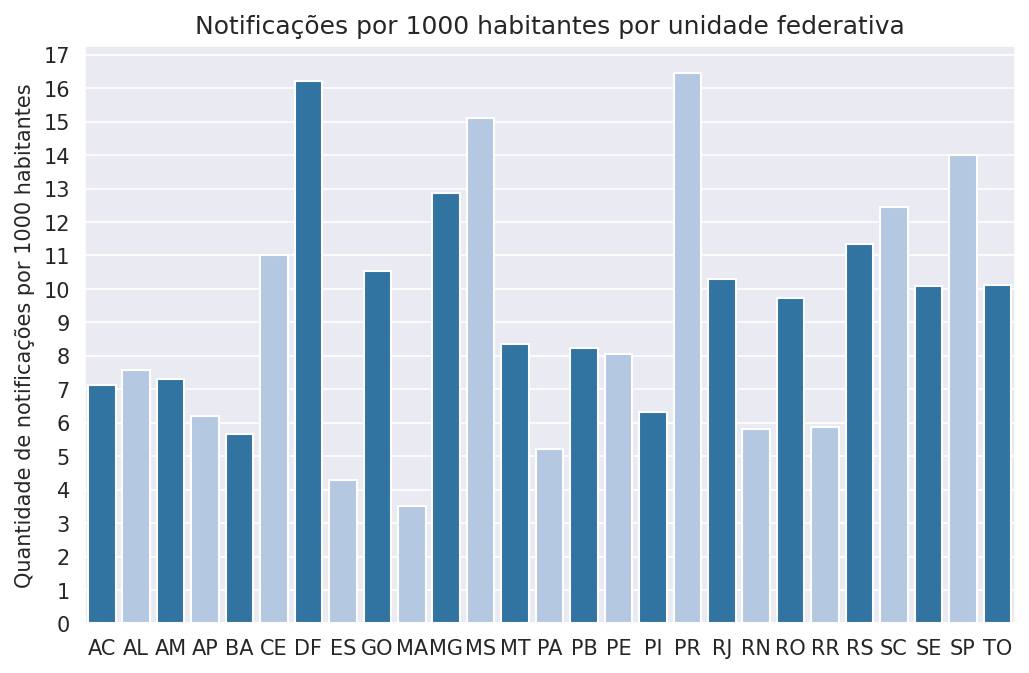

In [ ]:
sns.barplot(data=df_populacao, x='UF', y='NotPor1000Hab', palette=[plt.get_cmap(PALETA)(i) for i in (0, 1)])

plt.title('Notificações por 1000 habitantes por unidade federativa')
plt.xlabel('')
plt.ylabel('Quantidade de notificações por 1000 habitantes')

plt.yticks(range(int(np.ceil(df_populacao['NotPor1000Hab'].max() + 1))));

## Evoluções por 1000 habitantes por unidade federativa

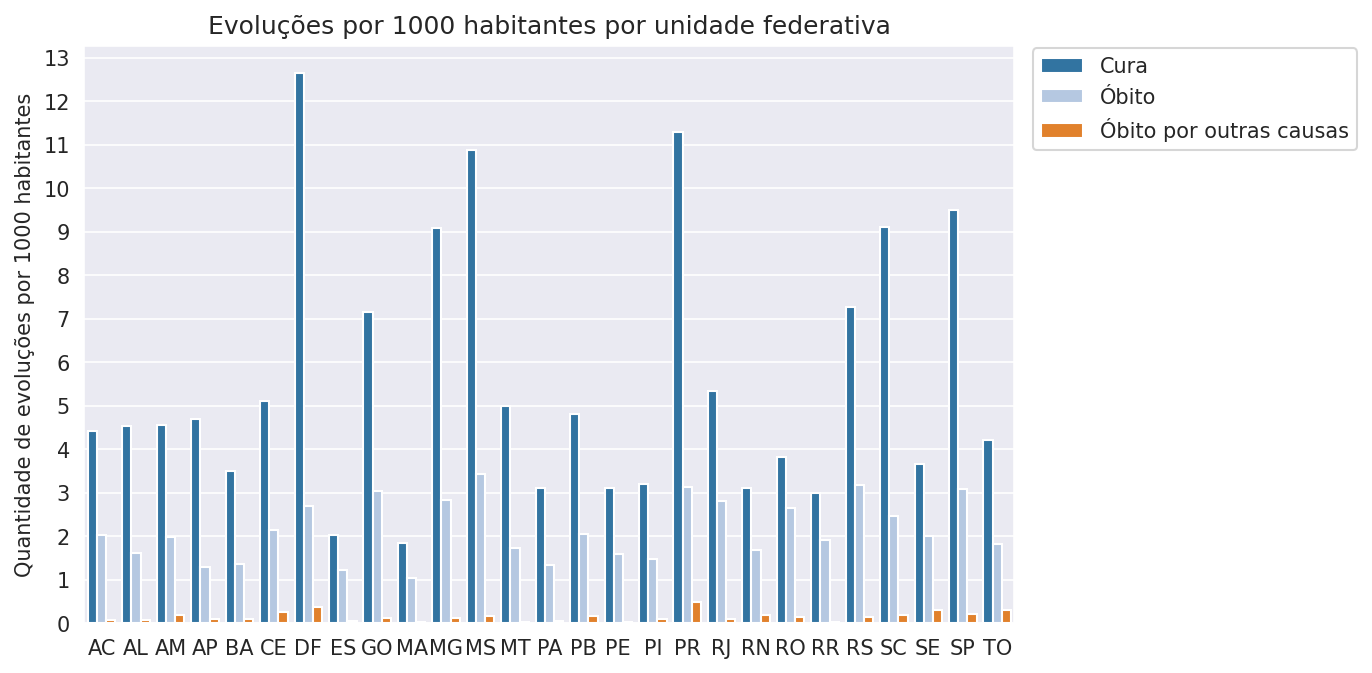

In [ ]:
ax = sns.barplot(data=df_evolucao, x='UF', y='Por1000Hab', hue='Evolucao', palette=PALETA)

plt.title('Evoluções por 1000 habitantes por unidade federativa')
plt.xlabel('')
plt.ylabel('Quantidade de evoluções por 1000 habitantes')

plt.yticks(range(int(np.ceil(df_evolucao['Por1000Hab'].max() + 1))))

handles, _ = ax.get_legend_handles_labels()

plt.legend(loc=(1.02, 0.82), frameon=True, facecolor='white', handles=handles, labels=EVOLUCOES.values());

## Óbitos por COVID-19 por 1000 habitantes por unidade federativa

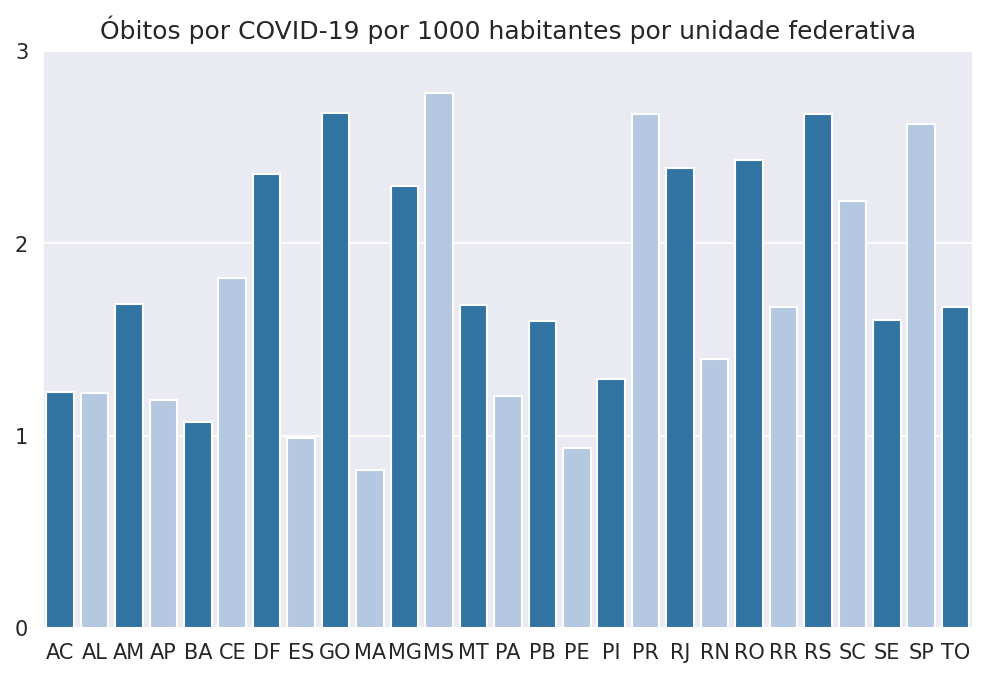

In [ ]:
sns.barplot(data=df_obitos_covid, x='UF', y='Por1000Hab', palette=[plt.get_cmap(PALETA)(i) for i in (0, 1)])

plt.title('Óbitos por COVID-19 por 1000 habitantes por unidade federativa')
plt.xlabel('')
plt.ylabel('')

plt.yticks(range(int(np.ceil(df_obitos_covid['Por1000Hab'].max() + 1))));

## Diagnósticos finais por evolução

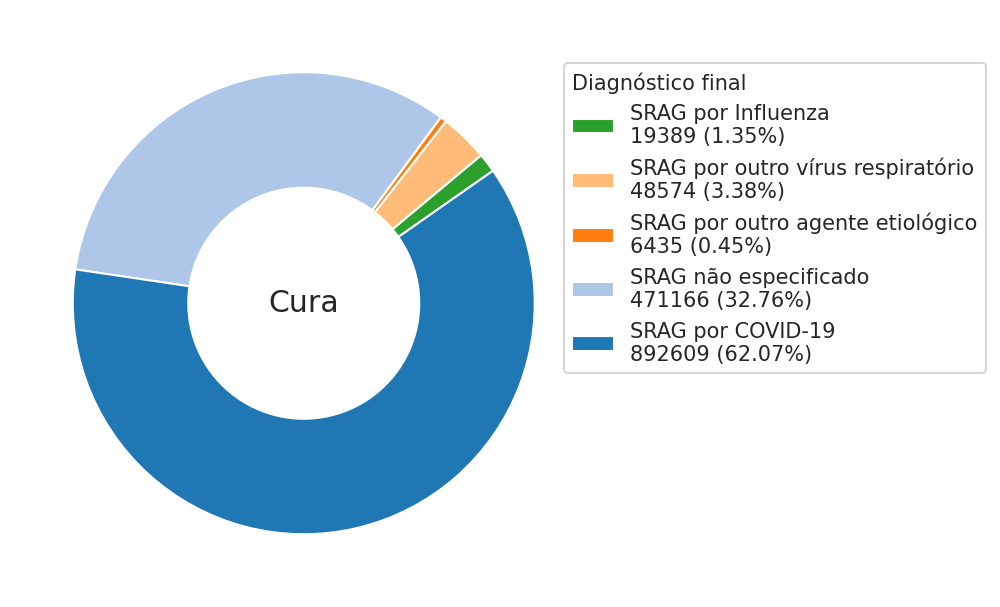

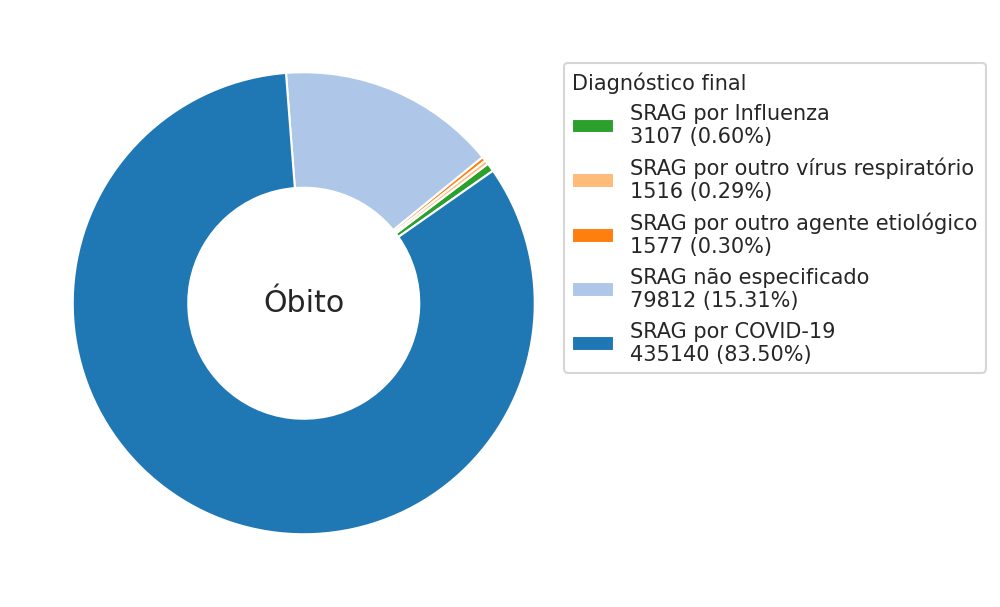

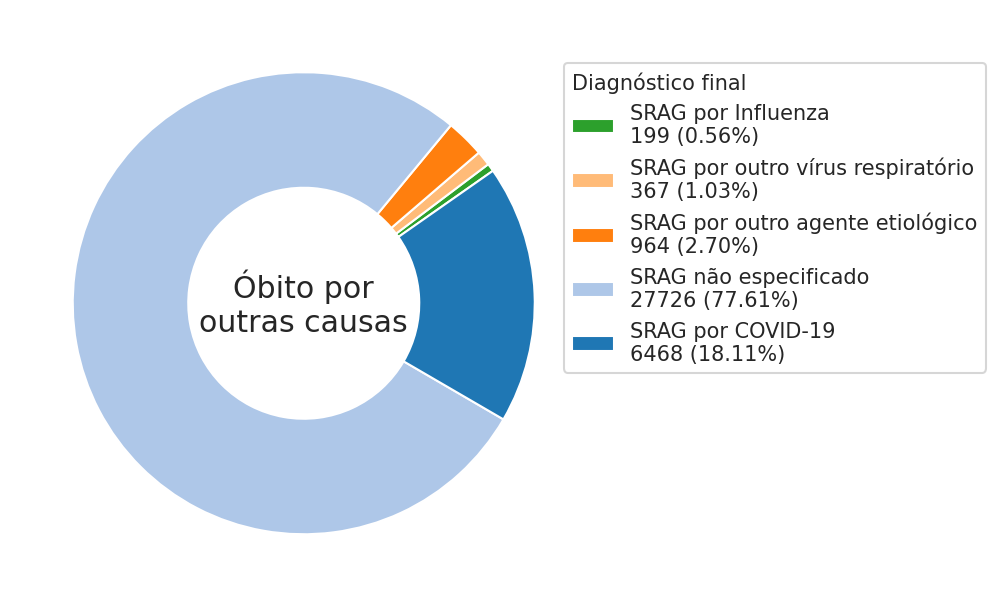

In [ ]:
for ev_cod, ev_desc in EVOLUCOES.items():

    dados    = df_diagnostico['Quantidade'][df_diagnostico['Evolucao'] == ev_cod].to_list()
    rotulos  = [f'{di}\n{da} ({((da / sum(dados)) * 100):0.2f}%)' for di, da in zip(DIAGNOSTICOS.values(), dados)]
    evolucao = ev_desc if (len(ev_desc.split()) == 1) else ('\n'.join([' '.join(m) for m in np.array_split(ev_desc.split(), 2)]))

    fig, ax = plt.subplots()

    # ax.set_prop_cycle('color', [plt.get_cmap(PALETA)(1. * i / len(dados)) for i in range(len(dados))])
    # ax.pie(dados, wedgeprops={'width': 0.5, 'edgecolor': 'w'}, startangle=35)
    ax.pie(dados, wedgeprops={'width': 0.5, 'edgecolor': 'w'}, startangle=35, colors=[plt.get_cmap(PALETA)(i) for i in (4, 3, 2, 1, 0)])
    ax.text(0, 0, evolucao, ha='center', va='center', fontsize='x-large')

    legenda = ax.legend(loc=(0.95, 0.38), frameon=True, facecolor='white', title='Diagnóstico final', labels=rotulos)
    legenda._legend_box.align = 'left'

    plt.show()

## Notificações por unidade federativa por sexo

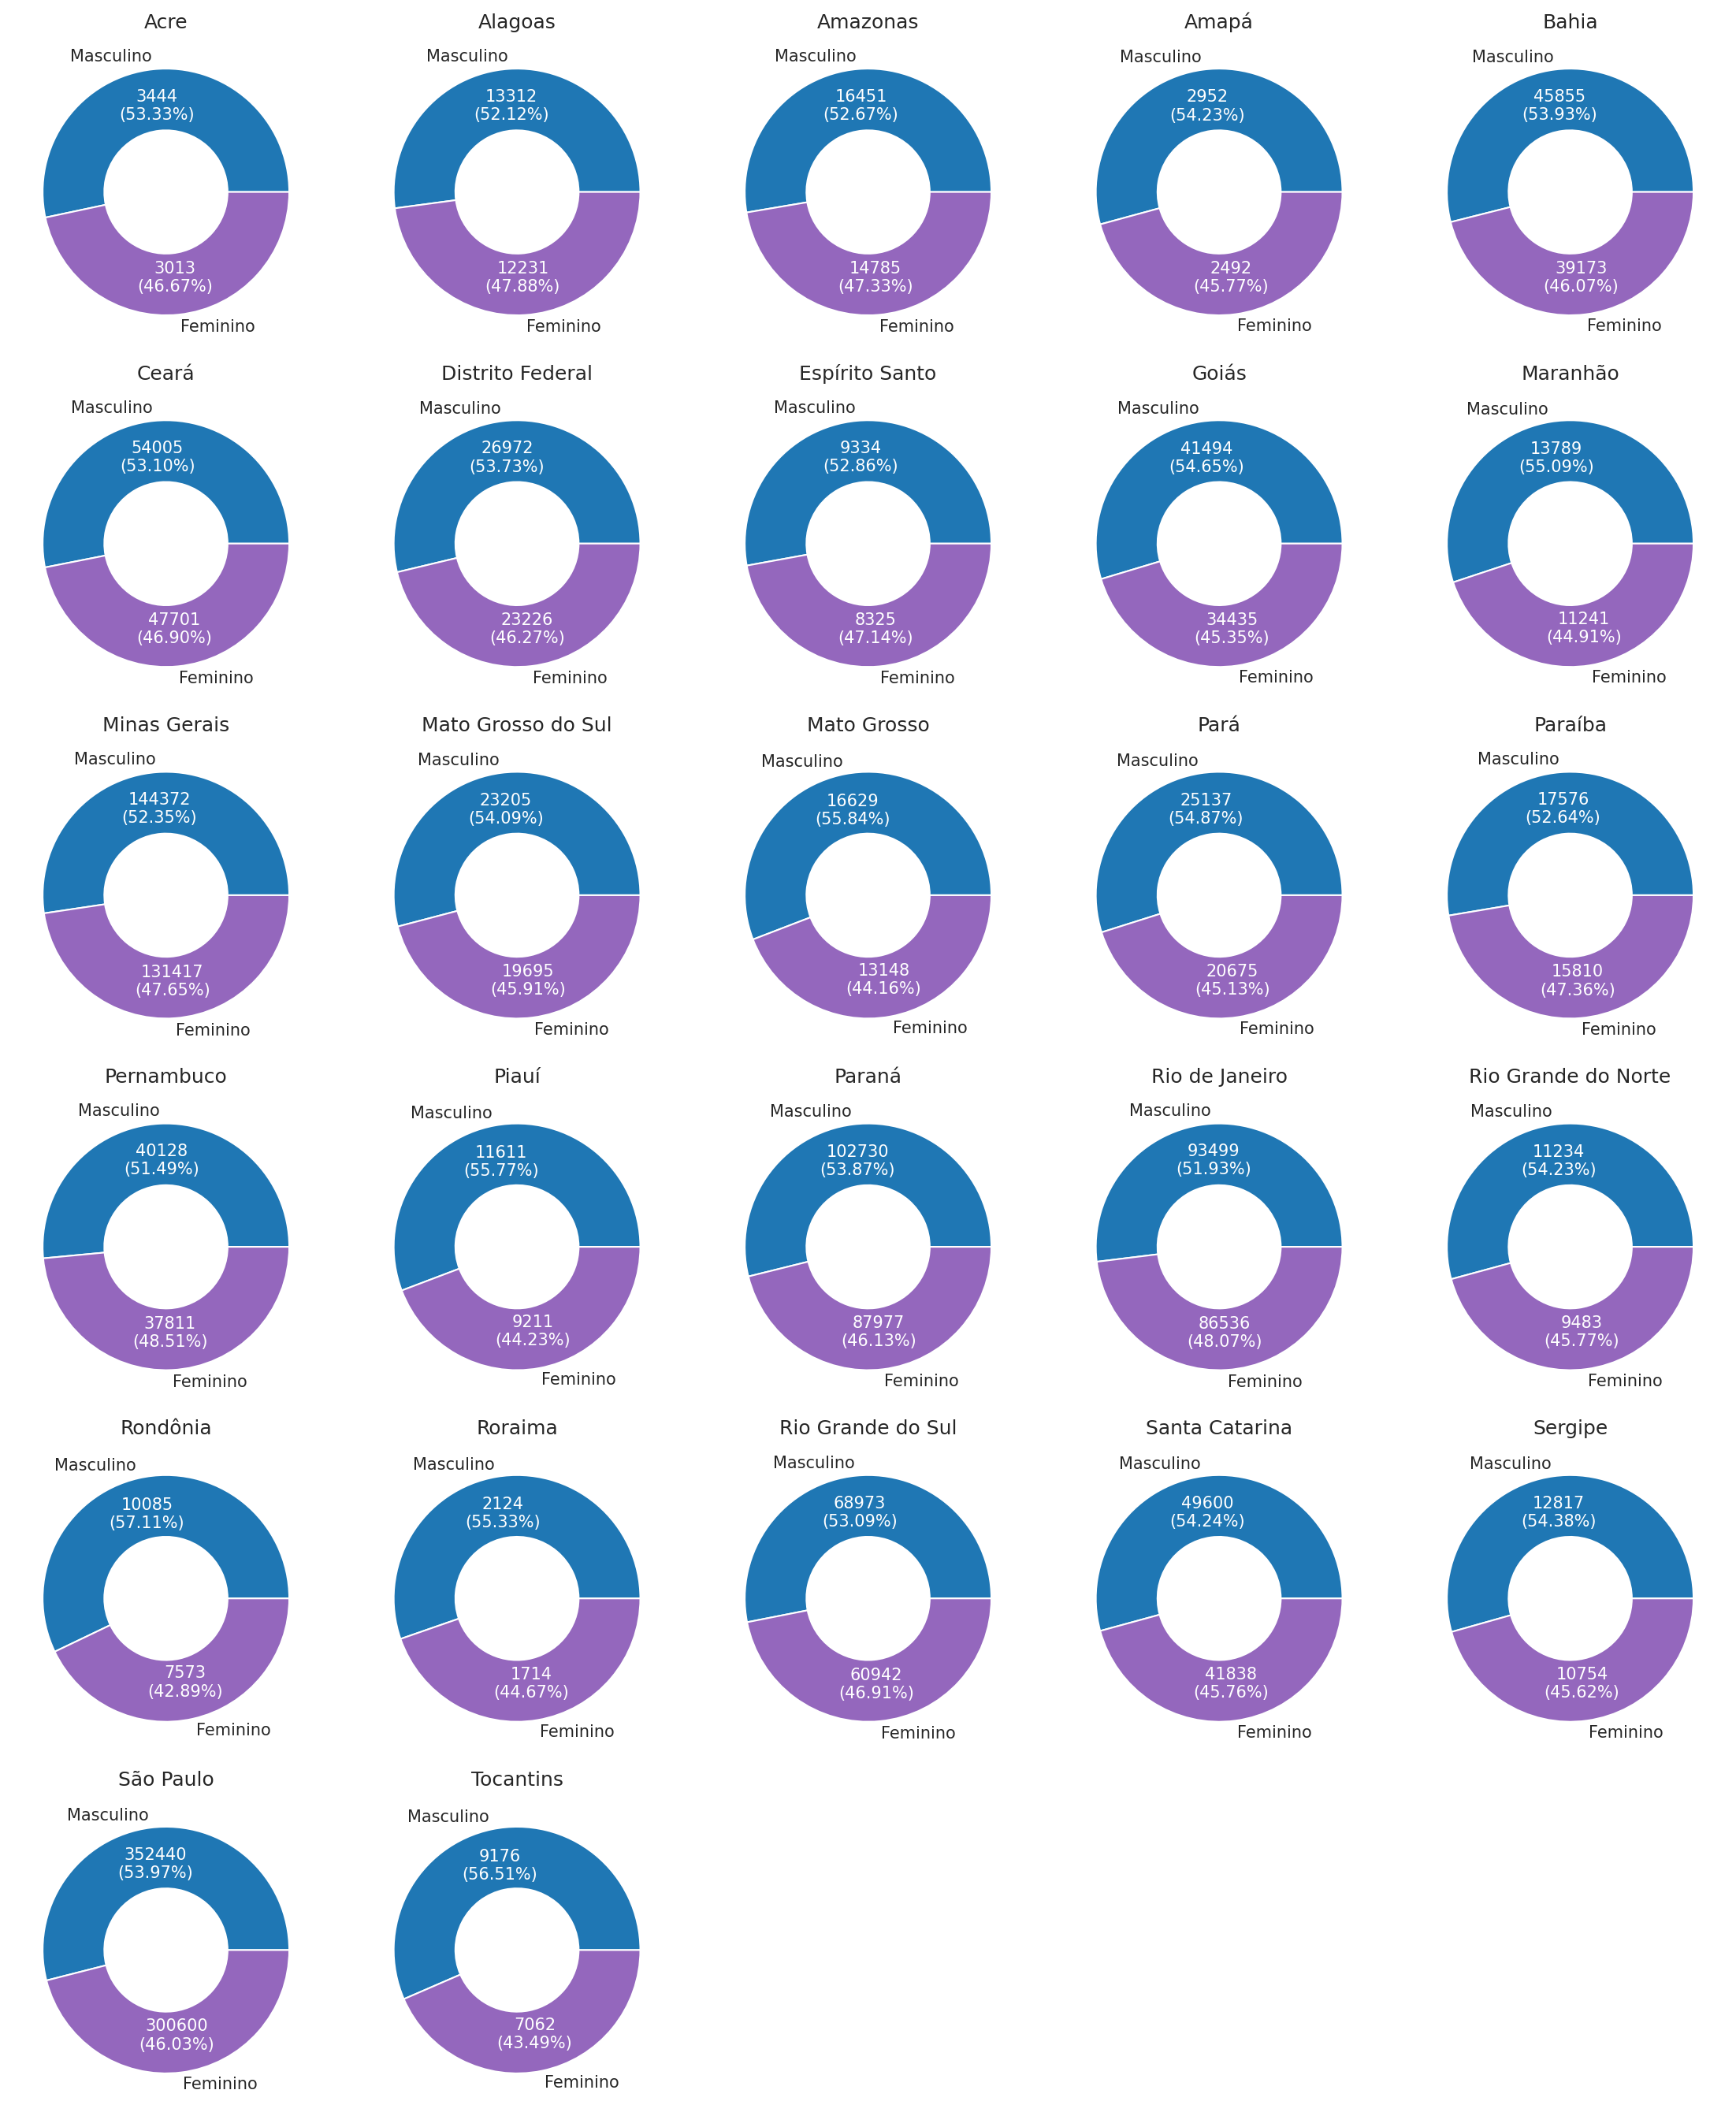

In [ ]:
colunas = 5
linhas  = int(np.ceil(len(df_populacao) / colunas))

fig, ax = plt.subplots(linhas, colunas, figsize=[15, 18])

def func(pct, dados):
    return f"{int(pct / 100 * np.sum(dados))}\n({pct:0.2f}%)"

for i, uf in df_populacao.iterrows():

    dados = uf[['NotMasculino', 'NotFeminino']]

    _, _, autotexts = ax[i // colunas, i % colunas].pie(dados,
                                                        labels=SEXOS.values(),
                                                        autopct=lambda pct: func(pct, dados),
                                                        pctdistance=0.7,
                                                        wedgeprops={'width': 0.5,
                                                                    'edgecolor': 'w'},
                                                        colors=CORES)
    
    [autotext.set_color('white') for autotext in autotexts]

    ax[i // colunas, i % colunas].set_title(uf['Nome'])

for i in range(3):
    ax[linhas - 1, i + 2].set_visible(False)

plt.tight_layout()

## Diferença média de dias entre primeiros sintomas e notificação

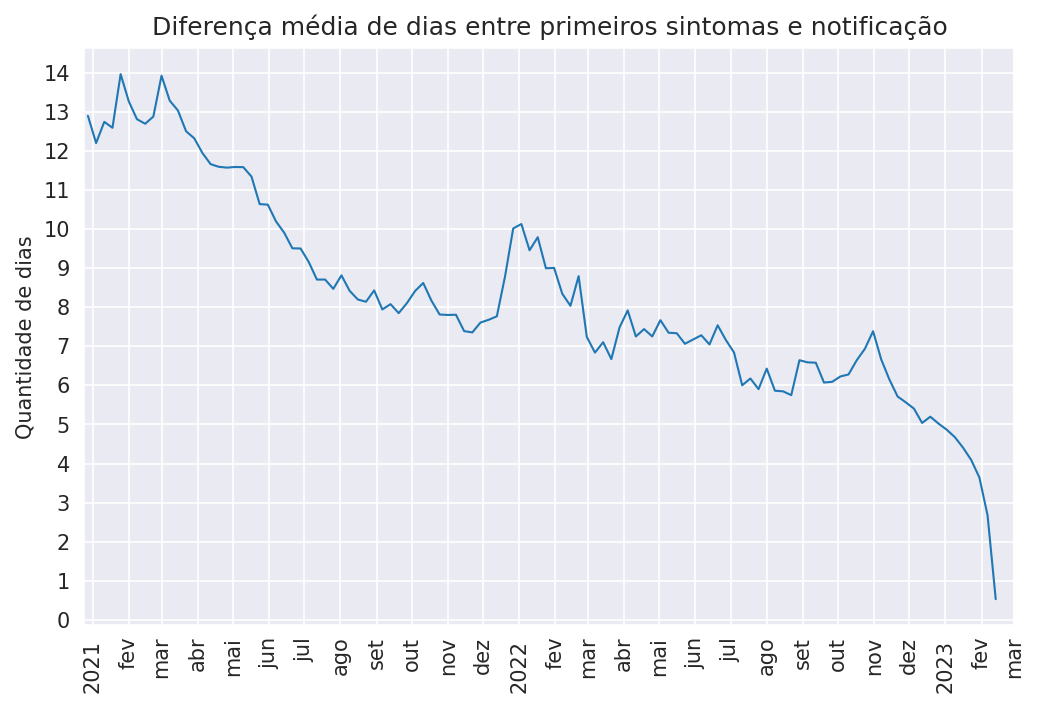

In [ ]:
ax = sns.lineplot(data=df_demora, x='Segunda-feira', y='Dias', linewidth=1, color=CORES[0])

plt.title('Diferença média de dias entre primeiros sintomas e notificação')
plt.xlabel('')
plt.ylabel('Quantidade de dias')

plt.xlim(XLIM)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

for tick in ax.get_xticklabels(which='both'):
    tick.set_rotation(90)

plt.yticks(range(int(np.ceil(df_demora['Dias'].max() + 1))))

plt.grid(visible=True, which='both', axis='both');

## Evoluções por semana de primeiros sintomas

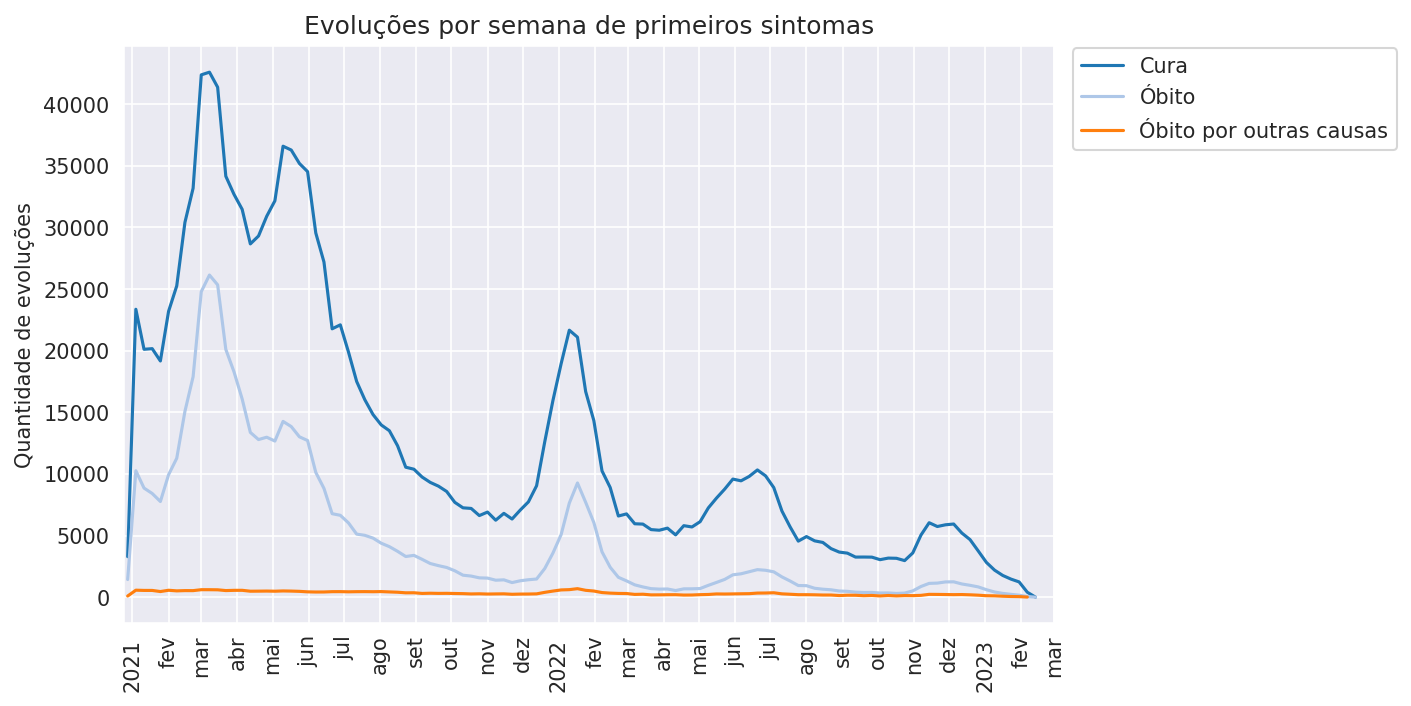

In [ ]:
ax = sns.lineplot(data=df_evolucao_prisin, x='Segunda-feira', y='Quantidade', hue='Evolucao', palette=PALETA)

plt.title('Evoluções por semana de primeiros sintomas')
plt.xlabel('')
plt.ylabel('Quantidade de evoluções')

plt.xlim(XLIM)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

for tick in ax.get_xticklabels(which='both'):
    tick.set_rotation(90)

ytick_step = 5000

plt.yticks(np.arange(0, int(np.ceil(df_evolucao_prisin['Quantidade'].max() / ytick_step) * ytick_step), ytick_step))

plt.grid(visible=True, which='both', axis='both')

handles, _ = ax.get_legend_handles_labels()

plt.legend(loc=(1.02, 0.82), frameon=True, facecolor='white', handles=handles, labels=EVOLUCOES.values());

## Média de notificações por semana por raça

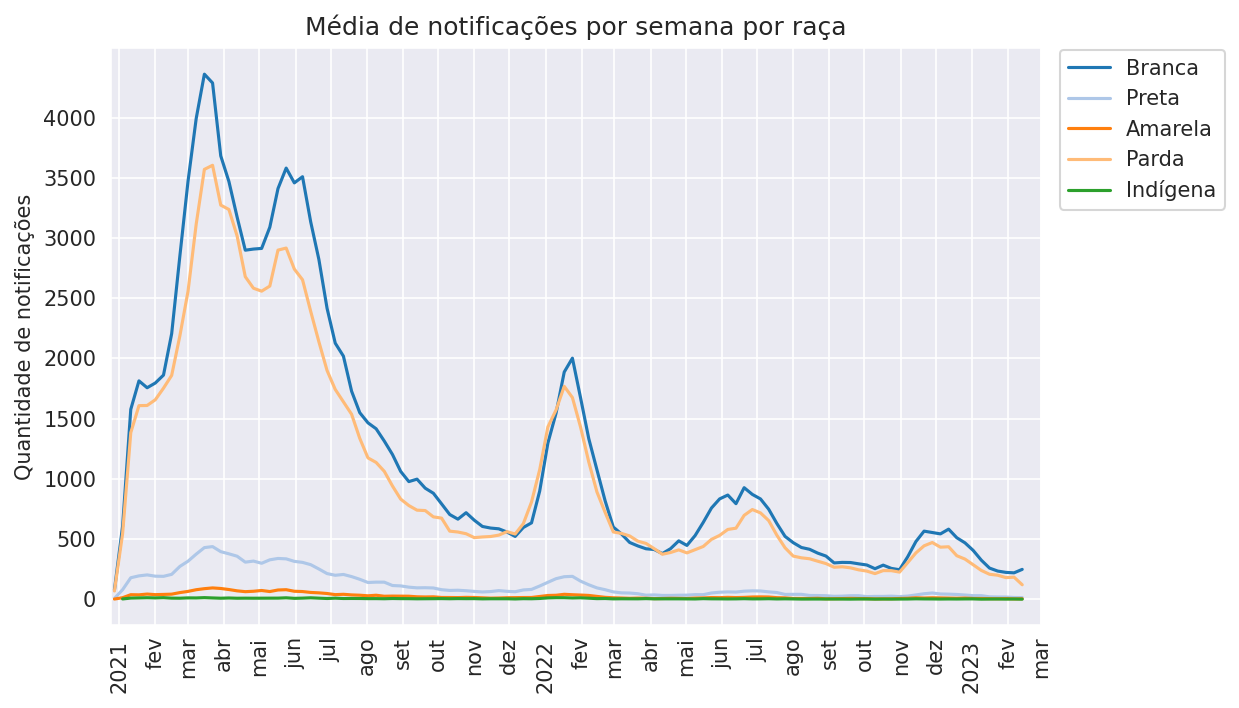

In [ ]:
ax = sns.lineplot(data=df_raca, x='Segunda-feira', y='Quantidade', hue='Raca', palette=PALETA)

plt.title('Média de notificações por semana por raça')
plt.xlabel('')
plt.ylabel('Quantidade de notificações')

plt.xlim(XLIM)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

for tick in ax.get_xticklabels(which='both'):
    tick.set_rotation(90)

ytick_step = 500

plt.yticks(np.arange(0, int(np.ceil(df_raca['Quantidade'].max() / ytick_step) * ytick_step), ytick_step))

plt.grid(visible=True, which='both', axis='both')

handles, _ = ax.get_legend_handles_labels()

plt.legend(loc=(1.02, 0.72), frameon=True, facecolor='white', handles=handles, labels=RACAS.values());

## Média de notificações por semana por escolaridade

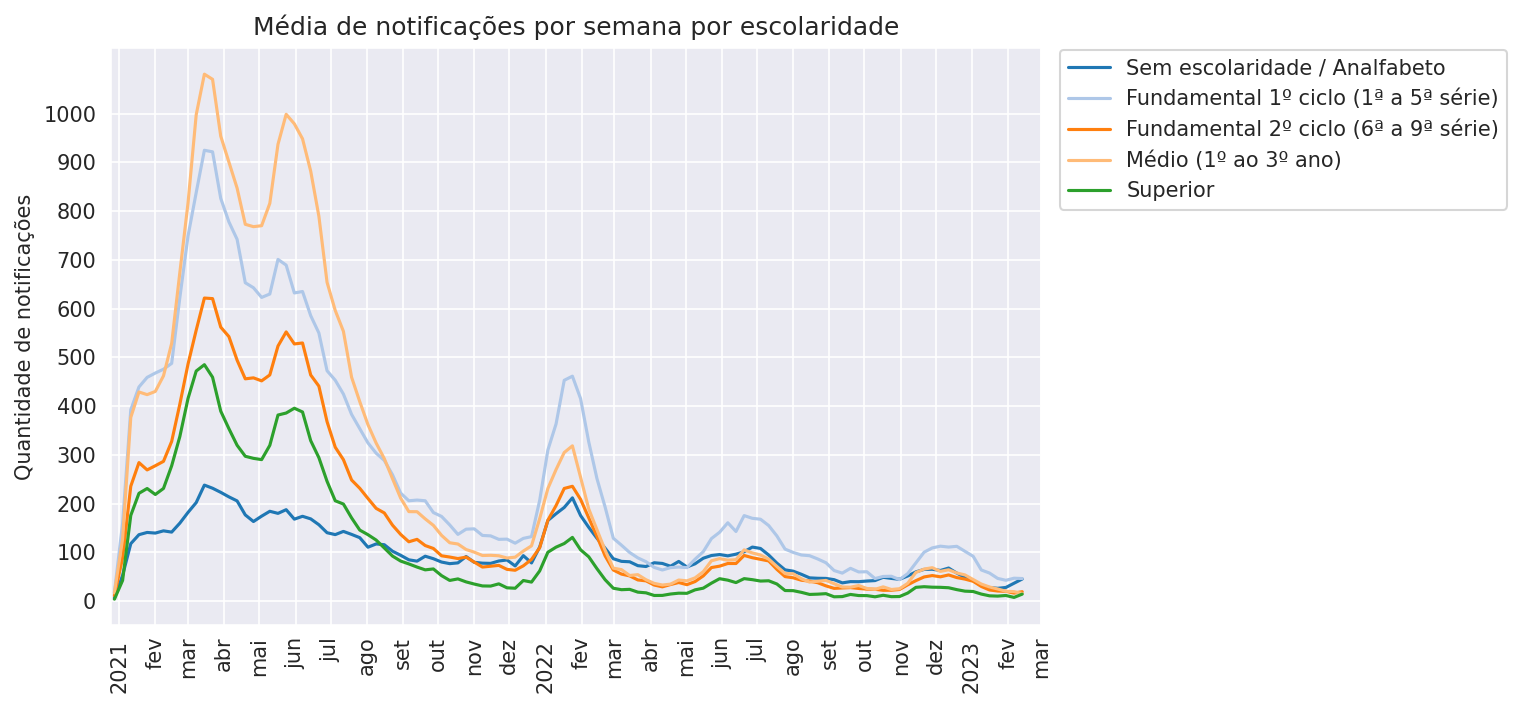

In [ ]:
ax = sns.lineplot(data=df_escolaridade, x='Segunda-feira', y='Quantidade', hue='Escolaridade', palette=PALETA)

plt.title('Média de notificações por semana por escolaridade')
plt.xlabel('')
plt.ylabel('Quantidade de notificações')

plt.xlim(XLIM)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

for tick in ax.get_xticklabels(which='both'):
    tick.set_rotation(90)

ytick_step = 100

plt.yticks(np.arange(0, int(np.ceil(df_escolaridade['Quantidade'].max() / ytick_step) * ytick_step), ytick_step))

plt.grid(visible=True, which='both', axis='both')

handles, _ = ax.get_legend_handles_labels()

plt.legend(loc=(1.02, 0.72), frameon=True, facecolor='white', handles=handles, labels=ESCOLARIDADES.values());

## Média de notificações por semana por zona

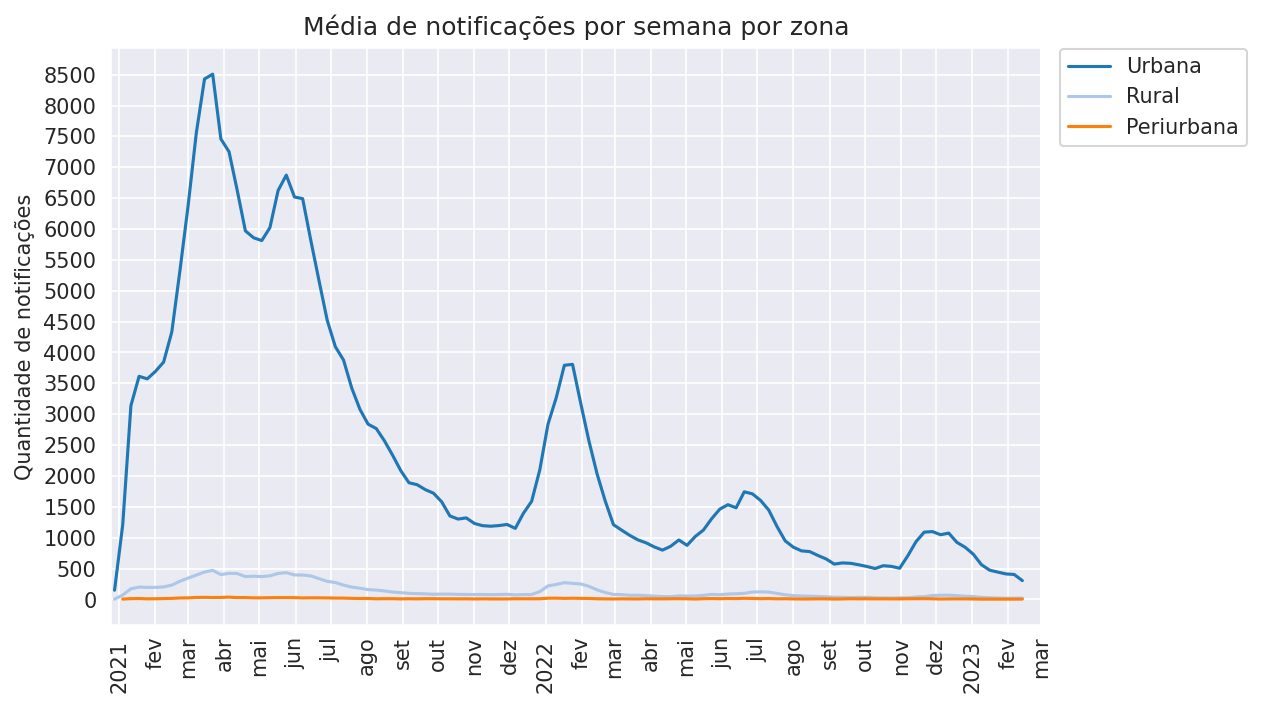

In [ ]:
ax = sns.lineplot(data=df_zona, x='Segunda-feira', y='Quantidade', hue='Zona', palette=PALETA)

plt.title('Média de notificações por semana por zona')
plt.xlabel('')
plt.ylabel('Quantidade de notificações')

plt.xlim(XLIM)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

for tick in ax.get_xticklabels(which='both'):
    tick.set_rotation(90)

ytick_step = 500

plt.yticks(np.arange(0, int(np.ceil(df_zona['Quantidade'].max() / ytick_step) * ytick_step), ytick_step))

plt.grid(visible=True, which='both', axis='both')

handles, _ = ax.get_legend_handles_labels()

plt.legend(loc=(1.02, 0.83), frameon=True, facecolor='white', handles=handles, labels=ZONAS.values());

## Média de dias hospitalizado ou internado em UTI

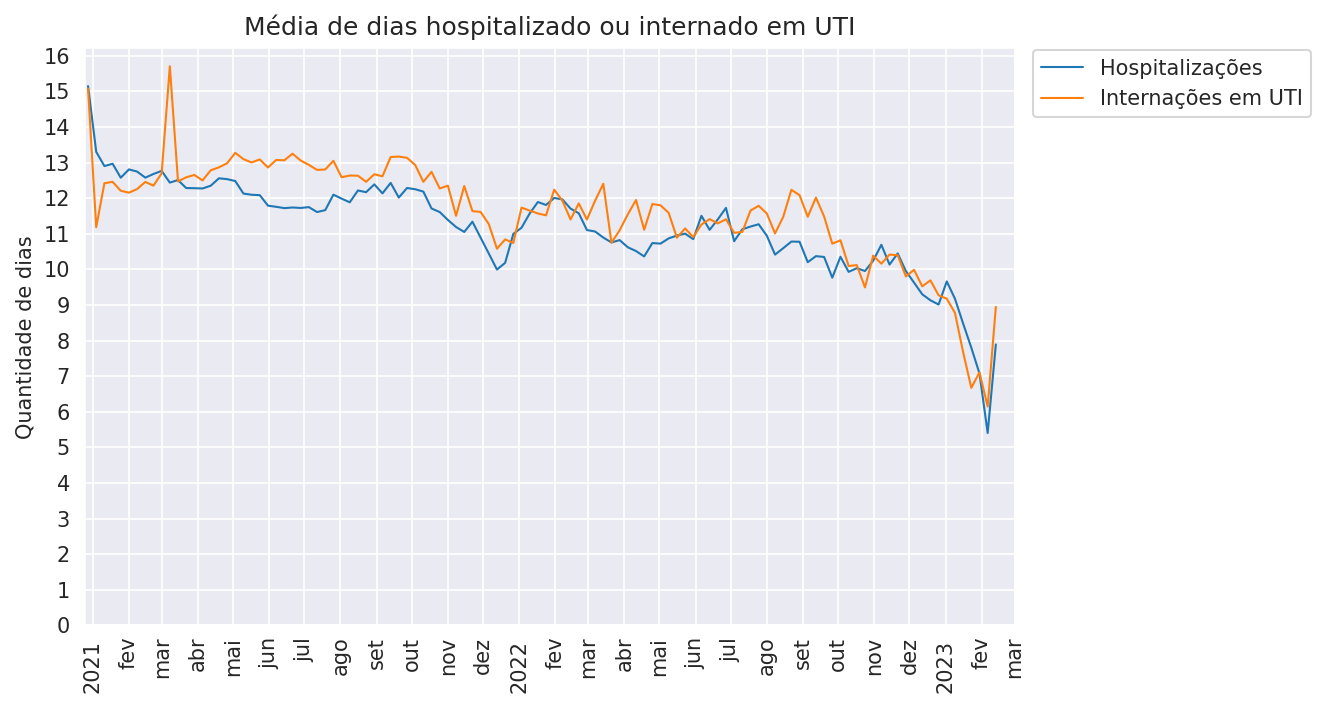

In [ ]:
ax = sns.lineplot(data=df_internacao, x='Segunda-feira', y='Dias', linewidth=1, color=CORES[0], label='Hospitalizações')
sns.lineplot(data=df_uti, x='Segunda-feira', y='Dias', linewidth=1, color=CORES[3], label='Internações em UTI')

plt.title('Média de dias hospitalizado ou internado em UTI')
plt.xlabel('')
plt.ylabel('Quantidade de dias')

plt.xlim(XLIM)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

for tick in ax.get_xticklabels(which='both'):
    tick.set_rotation(90)

# plt.yticks(range(int(np.floor(min(df_internacao['Dias'].min(), df_uti['Dias'].min()) - 1)),
#                  int(np.ceil(max(df_internacao['Dias'].max(), df_uti['Dias'].max()) + 1))))

plt.yticks(range(int(np.ceil(max(df_internacao['Dias'].max(), df_uti['Dias'].max()) + 1))))

plt.grid(visible=True, which='both', axis='both')

plt.legend(loc=(1.02, 0.88), frameon=True, facecolor='white');

## Presença de sintomas em notificações por semana

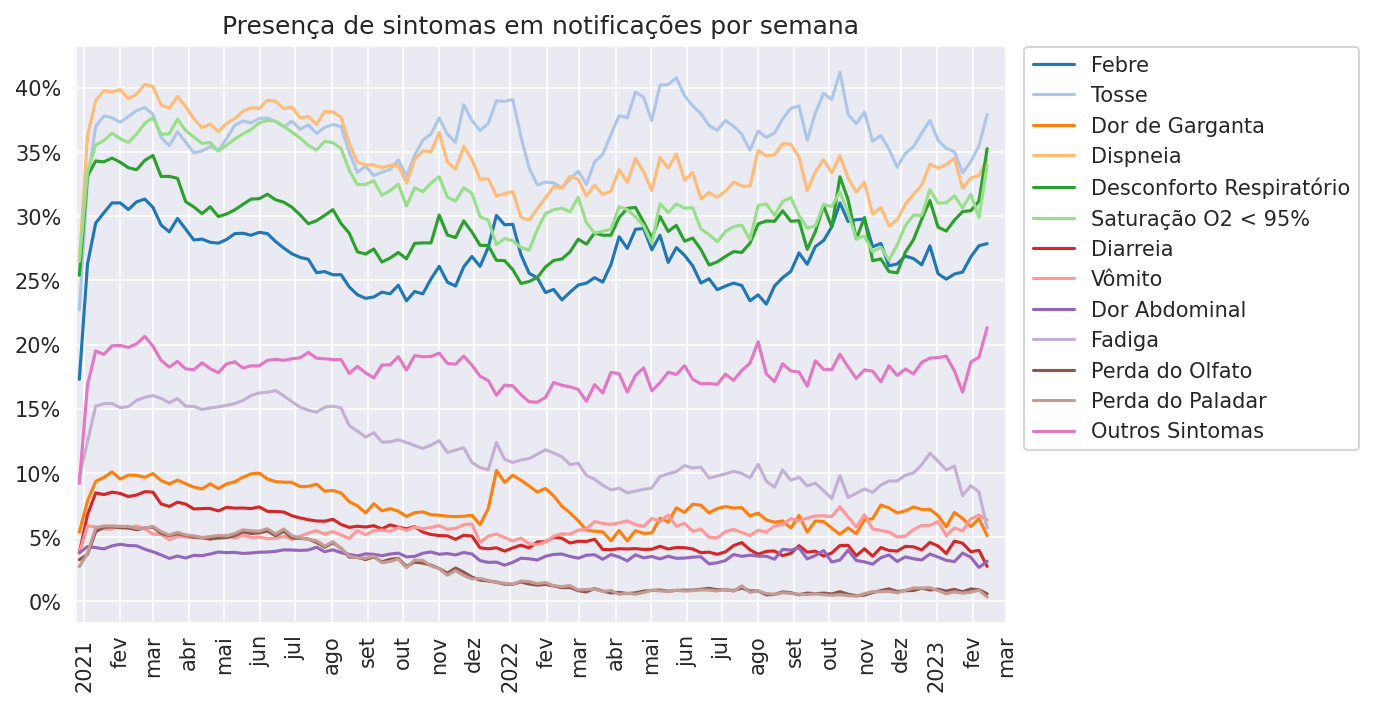

In [ ]:
ax = sns.lineplot(data=df_sintomas_semana, x='Segunda-feira', y='Presença', hue='Sintoma', palette=PALETA)

plt.title('Presença de sintomas em notificações por semana')
plt.xlabel('')
plt.ylabel('')

plt.xlim(XLIM)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

for tick in ax.get_xticklabels(which='both'):
    tick.set_rotation(90)

ytick_step = 0.05
yticks     = np.arange(0, np.ceil(df_sintomas_semana['Presença'].max() / ytick_step) * ytick_step, ytick_step)

plt.yticks(ticks=yticks, labels=[f'{int(t * 100)}%' for t in yticks])

plt.grid(visible=True, which='both', axis='both')

plt.legend(loc=(1.02, 0.3), frameon=True, facecolor='white');

## Proporção de curas por óbitos por COVID-19

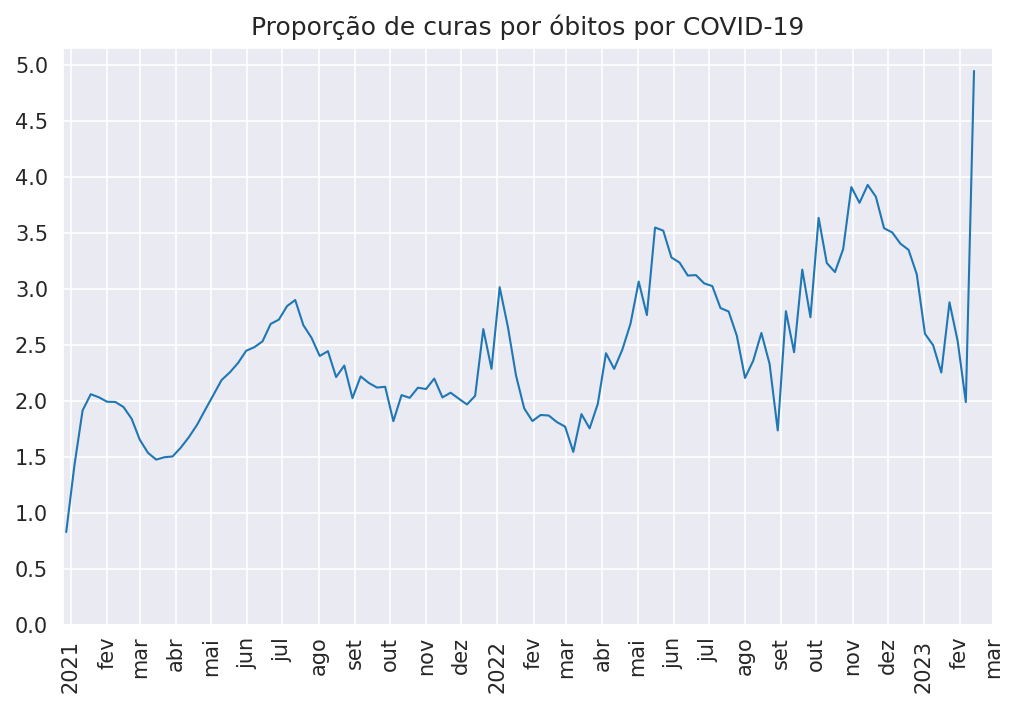

In [ ]:
ax = sns.lineplot(data=df_cura_obito, x='Segunda-feira', y='Proporcao', linewidth=1, color=CORES[0])

plt.title('Proporção de curas por óbitos por COVID-19')
plt.xlabel('')
plt.ylabel('')

plt.xlim(XLIM)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

for tick in ax.get_xticklabels(which='both'):
    tick.set_rotation(90)

ytick_step = 0.5

plt.yticks(np.arange(0, np.ceil((df_cura_obito['Proporcao'].max() / ytick_step) * ytick_step) + ytick_step, ytick_step))

plt.grid(visible=True, which='both', axis='both');

## Correlações entre sintomas

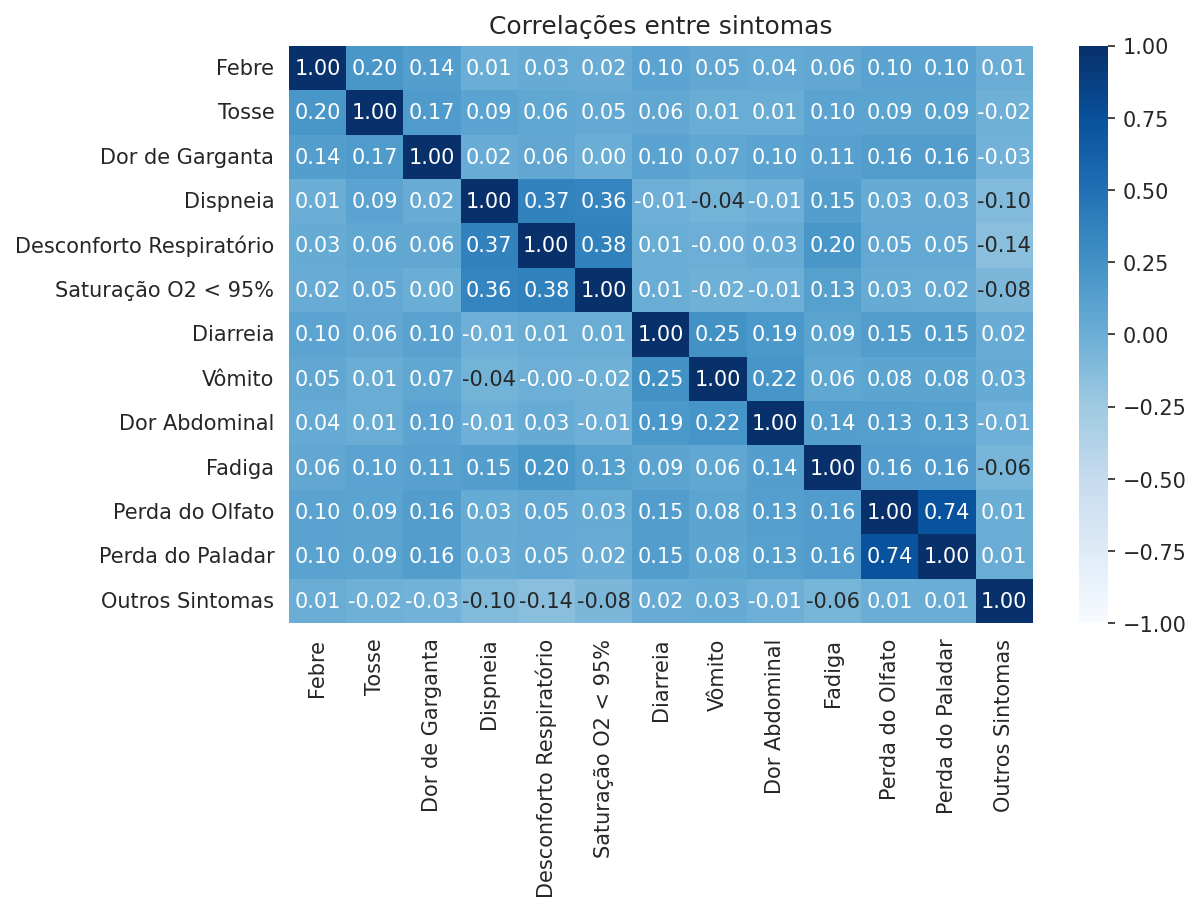

In [ ]:
sns.heatmap(data=df_sintomas[SINTOMAS].corr(), annot=True, fmt="0.2f", vmin=-1, vmax=1, cmap='Blues',
            xticklabels=list(df_sintomas_semana['Sintoma'].unique()),
            yticklabels=list(df_sintomas_semana['Sintoma'].unique()))

plt.title('Correlações entre sintomas');